# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Legend:
White -> FLAT<br>
Light grey-> HILLY<br>
Dark grey->FOREST<br>
Black-> BLOCK


In [1]:
# %run a_star_2.ipynb
%run a_star.ipynb
%run agent_9.ipynb
import numpy as np
import random
from matplotlib import cm

# Code for Agent 6 goes here

In [2]:
def display2(matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    matrix: maze of the problem
    """
    temp = matrix.copy()
    colormap = cm.get_cmap("Greys")
    plt.imshow(temp, cmap=colormap)
    plt.show()

In [3]:
def run_agent_6(agent6, maze):
#     print("Agent6 started.\nMaze Size: ",maze_size," Source: ",maze.source," Target: ",maze.target)
    source = maze.source
    target = maze.target
    terrain_matrix = maze.terrain_matrix
    full_grid_world_matrix = maze.full_grid_world_matrix
    agent_gridworld = agent6.agent_gridworld
    valid = []
    
    if source == target:
        target_reached = True
        print("found goal")
        return
    else:
        target_reached = False

    while not target_reached:
        initialize(maze_size,0.3)
        current_target = agent6.getMaxProbabilityCell(source)
        path = astar(source,current_target, agent6.agent_gridworld_0_1)[0]
        if(len(path)==0):
            agent6.agent_gridworld_0_1[current_target[0],current_target[1]] = 1
            agent6.update_beliefs_when_xy_blocked(current_target[0], current_target[1], maze_size)
            agent6.agent_gridworld.itemset(current_target,3)
            maze.full_grid_world_matrix[current_target[0],current_target[1]] =1
            maze.terrain_matrix[current_target[0],current_target[1]] = 3
            print("There is no path to the target, try another grid")
            break

        for i in range(len(path)):
            node = path[i]
            if full_grid_world_matrix.item(node) == 0:
                terrain_type = terrain_matrix.item(node)
                agent6.agent_gridworld.itemset(node, terrain_type)
                if i == len(path)-1:
                    if(agent6.examine(node, terrain_type, maze)):
                        print("found goal")
                        target_reached = True
                        break
                    else:
                        #update probabiities when failed to be found and terrain type=terrain_matrix.item(node)
                        current_target, type1, type2 = maze.target_moves(maze_size)
                        print("\n")
                        source = node
                        agent6.update_belief(maze, type1, type2)
                        agent6.update_certainties(maze)
                        source = path[i]
                        break
            elif full_grid_world_matrix.item(node) == 1:
                agent6.agent_gridworld_0_1[node[0],node[1]] = 1
                current_target, type1, type2 = maze.target_moves(maze_size)
                print('node', node, ' is blocked and current_target is ', current_target)
                print("\n")
                agent6.update_beliefs_when_xy_blocked(node[0], node[1], maze_size)
#                 agent6.update_belief(maze, type1, type2)
                agent6.update_certainties(maze)
                agent6.agent_gridworld.itemset(node,3)
                source = path[i-1]
                break

#         current_target = source


# Main function

Maze size: 10 
Source:  (3, 1) 
Target: (4, 7) 
maze:


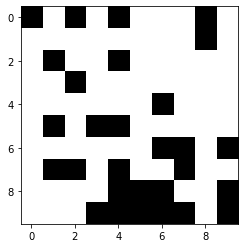

The next target to be visited is (2, 1)
node (5, 1)  is blocked and current_target is  (4, 9)


The next target to be visited is (3, 1)
node (7, 2)  is blocked and current_target is  (2, 8)


The next target to be visited is (5, 2)
node (9, 3)  is blocked and current_target is  (4, 2)


The next target to be visited is (8, 2)
node (8, 4)  is blocked and current_target is  (9, 1)


The next target to be visited is (7, 3)


The next target to be visited is (8, 3)


The next target to be visited is (8, 2)
node (7, 4)  is blocked and current_target is  (1, 0)


The next target to be visited is (8, 3)


The next target to be visited is (8, 2)
node (8, 5)  is blocked and current_target is  (8, 1)


The next target to be visited is (7, 6)


The next target to be visited is (7, 5)
node (8, 6)  is blocked and current_target is  (0, 1)


The next target to be visited is (7, 5)
node (7, 7)  is blocked and current_target is  (2, 7)


The next target to be visited is (7, 5)
node (6, 6)  is blocked 

In [4]:
if __name__ == "__main__":

    #Initialize Maze
    maze_size = 10
    maze = gridworld(maze_size)

    # set source and target
    initialize(maze_size,0.3)
#     print(maze.source,maze.target, maze.full_grid_world_matrix)
    path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    while(len(path)==0):
        print("finding valid source and target")
        maze.source, maze.target = maze.set_valid_source_target(maze_size)
        initialize(maze_size,0.3)
        path = astar(maze.source, maze.target, maze.full_grid_world_matrix)

    # Initialize Agent 6
    agent6 = agent_6(maze_size)

    #Print all details
    print("Maze size:",maze_size,"\nSource: ",maze.source,"\nTarget:",maze.target,"\nmaze:")
    display2(maze.terrain_matrix)
    #runnning Agent 6 on maze
    run_agent_6(agent6, maze)

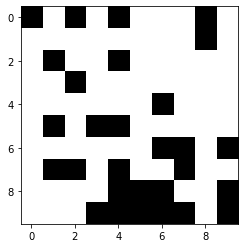

In [5]:
display2(maze.full_grid_world_matrix)